In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score
bcDB = datasets.load_breast_cancer()
import matplotlib.pyplot as plt

In [2]:
bcDF = pd.DataFrame(bcDB.data, columns= list(bcDB['feature_names']))
bcDF['target'] = pd.Series(bcDB.target)
bcDF = bcDF.sort_values(by = ['target'])
bcDF = bcDF.reset_index(drop=True)
bcDF.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,0.2384,0.07542,...,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460,0
2,12.34,26.86,81.15,477.4,0.1034,0.1353,0.1085,0.04562,0.1943,0.06937,...,39.34,101.7,768.9,0.1785,0.4706,0.4425,0.1459,0.3215,0.12050,0
3,14.86,23.21,100.40,671.4,0.1044,0.1980,0.1697,0.08878,0.1737,0.06672,...,27.78,118.6,784.7,0.1316,0.4648,0.4589,0.1727,0.3000,0.08701,0
4,13.77,22.29,90.63,588.9,0.1200,0.1267,0.1385,0.06526,0.1834,0.06877,...,34.01,111.6,806.9,0.1737,0.3122,0.3809,0.1673,0.3080,0.09333,0


In [3]:
vc = bcDF['target'].value_counts()
for i,j in enumerate(bcDB.target_names):
    print (vc[i],j)

212 malignant
357 benign


In [4]:
y = bcDF.pop('target').values
X = bcDF.values
X.shape, y.shape

((569, 30), (569,))

Function to generate the accurac, precision and recall score of each classifier

In [5]:
def model_report(y_actual, y_pred):
    print("Accuracy = ", accuracy_score(y_actual,y_pred))
    print("Precision = ", precision_score(y_actual,y_pred))
    print("Recall = ", recall_score(y_actual,y_pred))

# Hold-Out

## $k$-NN
Malignant is the minority class at ~40%.  
$k$-NN classifier picks up this under-representation and accentuates it,  
predicting just 36% malignant. 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

kNN = KNeighborsClassifier(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
y_pred = kNN.fit(X_train, y_train).predict(X_test)
print(X_train.shape,X_test.shape)

y_test.sum()/len(y_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

(426, 30) (143, 30)
Malignant in test set : 0.40
Predicted malignant : 0.36


In [7]:
model_report(y_test, y_pred)

Accuracy =  0.916083916083916
Precision =  0.9021739130434783
Recall =  0.9651162790697675


## Logistic Regression

In [8]:
Log_reg = LogisticRegression(random_state = 2)
logistic_pred = Log_reg.fit(X_train,y_train).predict(X_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (logistic_pred.sum()/len(y_pred))))

Malignant in test set : 0.40
Predicted malignant : 0.37


C:\Users\kearn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
model_report(y_test, logistic_pred)

Accuracy =  0.9440559440559441
Precision =  0.9333333333333333
Recall =  0.9767441860465116


## Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
gaussian_classifier = GaussianNB()
naive_bayes_pred = gaussian_classifier.fit(X_train,y_train).predict(X_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (naive_bayes_pred.sum()/len(y_pred))))

Malignant in test set : 0.40
Predicted malignant : 0.39


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')
tree_pred = tree.fit(X_train,y_train).predict(X_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (tree_pred.sum()/len(y_pred))))

Malignant in test set : 0.40
Predicted malignant : 0.40


# Cross-Validation

In [12]:
from sklearn.model_selection import cross_val_score

## Trees

In [13]:
tree_scores = cross_val_score(tree, X, y, cv=4)
print("4x CV Accuracy Trees: {0:.2f}".format(tree_scores.mean()))
tree_scores

4x CV Accuracy Trees: 0.94


array([0.93706294, 0.94366197, 0.93661972, 0.92957746])

## Knn 

In [14]:
kNN_scores = cross_val_score(kNN, X, y, cv=4)
print("4x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean()))
kNN_scores

4x CV Accuracy kNNs: 0.92


array([0.9020979 , 0.91549296, 0.92957746, 0.95070423])

## Gaussian

In [15]:
gaussian_score = cross_val_score(gaussian_classifier,X,y,cv=4)
print("4x CV Accuracy Gaussian: {0:.2f}".format(gaussian_score.mean()))
gaussian_score

4x CV Accuracy Gaussian: 0.94


array([0.96503497, 0.92957746, 0.92253521, 0.94366197])

## Logistic Regression

In [16]:
logistic_reg_score = cross_val_score(Log_reg,X,y,cv=4)
print("4x CV Accuracy Logistic Regression: {0:.2f}".format(logistic_reg_score.mean()))
logistic_reg_score

4x CV Accuracy Logistic Regression: 0.95


C:\Users\kearn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kearn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kearn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kearn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95104895, 0.95070423, 0.95070423, 0.95774648])

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

models = [Log_reg,kNN,tree,gaussian_classifier]

folds = 4
v = 0 #  use 1 or 0

In [18]:
for m in models:
    cv_results = cross_validate(m, X, y, cv= folds,scoring=scoring, return_train_score=False, 
                                    verbose = v, n_jobs = -1)
    fp_rate = cv_results['test_fp'].sum()/(cv_results['test_fp'].sum()+cv_results['test_tn'].sum())
    tp_rate = cv_results['test_tp'].sum()/(cv_results['test_tp'].sum()+cv_results['test_fn'].sum())
  
    print("{} x CV {:22} FP: {:.2f}  TP: {:.2f}".format(folds, type(m).__name__, fp_rate, tp_rate)) 

4 x CV LogisticRegression     FP: 0.08  TP: 0.97
4 x CV KNeighborsClassifier   FP: 0.13  TP: 0.96
4 x CV DecisionTreeClassifier FP: 0.09  TP: 0.95
4 x CV GaussianNB             FP: 0.11  TP: 0.97


### Cross Validation analysis
Looking at cross validation it's clear that Logistic Regression is performing best. It has the lowest false positives which mean that there are less patients with cancer being diagnosed wrongly. It also is joint top with Gaussian for true positives. This means that it has the highest percentage of people with cancer being diagnosed correctly.

# Question 2
A strategy to rectify the bias is using undersampling. In our data the majority class is patients that don't have cancer. 357 people have a benign tumour while 212 have a malignant one which is cancer. What I've done below is taken a random sample of the 357 people that have a benign tumour and only select 200 of those. I also took a random sample of 200 people with a malignat tumpur too. This gives us an equeal distribution of malignant to benign tumours.

In [19]:
bcDF["target"] = y

In [20]:
malignant = bcDF.loc[bcDF["target"]==0].sample(n=200, random_state=2)
benign = bcDF.loc[bcDF["target"]==1].sample(n=200, random_state=2)
undersample_df = pd.concat([benign,malignant])
undersample_df["target"].value_counts()

1    200
0    200
Name: target, dtype: int64

In [21]:
y = undersample_df.pop('target').values
X = undersample_df.values

Function to create roc curve graph for each classifier, passing in the true and false positive rate

In [22]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=2,
                                                    test_size = .33)

y_pred = kNN.fit(X_train, y_train).predict(X_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

print(X_train.shape, X_test.shape)

Malignant in test set : 0.49
Predicted malignant : 0.44
(268, 30) (132, 30)


In [24]:
model_report(y_test, y_pred)

Accuracy =  0.9166666666666666
Precision =  0.8783783783783784
Recall =  0.9701492537313433


In [25]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.92


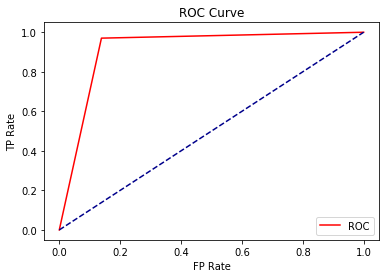

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [27]:
Log_reg = LogisticRegression(random_state = 2)
logistic_pred = Log_reg.fit(X_train,y_train).predict(X_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (logistic_pred.sum()/len(y_pred))))

Malignant in test set : 0.49
Predicted malignant : 0.47


C:\Users\kearn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
model_report(y_test, logistic_pred)

Accuracy =  0.9621212121212122
Precision =  0.9428571428571428
Recall =  0.9850746268656716


AUC: 0.96


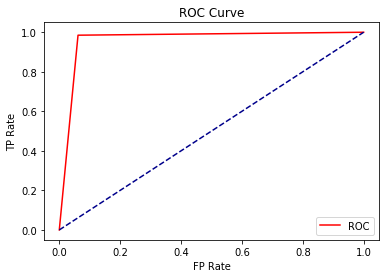

In [29]:
auc1 = roc_auc_score(y_test, logistic_pred)
print('AUC: %.2f' % auc1)
fpr, tpr, thresholds = roc_curve(y_test, logistic_pred)
plot_roc_curve(fpr, tpr)


In [30]:
gaussian_classifier = GaussianNB()
naive_bayes_pred = gaussian_classifier.fit(X_train,y_train).predict(X_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (naive_bayes_pred.sum()/len(y_pred))))

Malignant in test set : 0.49
Predicted malignant : 0.45


In [31]:
model_report(y_test, naive_bayes_pred)

Accuracy =  0.9242424242424242
Precision =  0.8904109589041096
Recall =  0.9701492537313433


AUC: 0.92


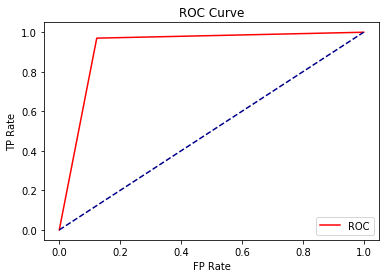

In [32]:
auc2 = roc_auc_score(y_test, naive_bayes_pred)
print('AUC: %.2f' % auc2)
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_pred)
plot_roc_curve(fpr, tpr)

In [33]:
tree = DecisionTreeClassifier(criterion='entropy')
tree_pred = tree.fit(X_train,y_train).predict(X_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (tree_pred.sum()/len(y_pred))))

Malignant in test set : 0.49
Predicted malignant : 0.50


In [34]:
model_report(y_test, tree_pred)

Accuracy =  0.9318181818181818
Precision =  0.9393939393939394
Recall =  0.9253731343283582


AUC: 0.93


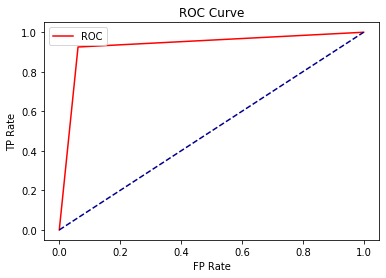

In [35]:
auc3 = roc_auc_score(y_test, tree_pred)
print('AUC: %.2f' % auc3)
fpr, tpr, thresholds = roc_curve(y_test, tree_pred)
plot_roc_curve(fpr, tpr)

### Analysis of undersampling in hold out testing
Logistic regression performs the best in accuracy while decision tree and naive bayes perform the worst. When comparing it to the results before undersampling was done we see that logistic regression has in fact actually improved. The accuracy before was 0.94 while with undersampling it improved to 0.96. Precision also improved from 0.93 to 0.94. This means that it is identifying more patients with malignant cancer that actually do have cancer, more than before.

# Question 3
For question 3 I'm using the diabetes data that Padraig has available on Brightspace.

In [36]:
diabetes_df = pd.read_csv('diabetes.csv')

In [37]:
diabetes_df.loc[diabetes_df['neg_pos'] == 'tested_positive', 'neg_pos'] = 1
diabetes_df.loc[diabetes_df['neg_pos'] == 'tested_negative', 'neg_pos'] = 0


In [38]:
diabetes_df['neg_pos'].value_counts()

0    500
1    268
Name: neg_pos, dtype: int64

In [39]:
tested_neg = diabetes_df.loc[diabetes_df["neg_pos"]==0].sample(n=268, random_state=2)
tested_positive = diabetes_df.loc[diabetes_df["neg_pos"]==1]
diabetes_undersample_df = pd.concat([tested_neg,tested_positive])

In [40]:
diabetes_undersample_df['neg_pos'].value_counts()

1    268
0    268
Name: neg_pos, dtype: int64

In [41]:
y = diabetes_undersample_df.pop('neg_pos').values
X = diabetes_undersample_df.values
X.shape, y.shape

((536, 8), (536,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
                                                    
    
y_pred = kNN.fit(X_train, y_train).predict(X_test)

print("Positive for diabetes in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted positive : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

print(X_train.shape, X_test.shape)

Positive for diabetes in test set : 0.50
Predicted positive : 0.53
(359, 8) (177, 8)


In [43]:
model_report(y_test, y_pred)

Accuracy =  0.7231638418079096
Precision =  0.7380952380952381
Recall =  0.6966292134831461


In [44]:
Log_reg = LogisticRegression(random_state = 2)
logistic_pred = Log_reg.fit(X_train,y_train).predict(X_test)
print("Positive for diabetes in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted positive : %0.2f" % (1- (logistic_pred.sum()/len(y_pred))))

Positive for diabetes in test set : 0.50
Predicted positive : 0.51


C:\Users\kearn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
model_report(y_test, logistic_pred)

Accuracy =  0.7796610169491526
Precision =  0.7906976744186046
Recall =  0.7640449438202247


In [46]:
gaussian_classifier = GaussianNB()
naive_bayes_pred = gaussian_classifier.fit(X_train,y_train).predict(X_test)
print("Positive for diabetes in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted positive : %0.2f" % (1- (naive_bayes_pred.sum()/len(y_pred))))

Positive for diabetes in test set : 0.50
Predicted positive : 0.54


In [47]:
model_report(y_test, naive_bayes_pred)

Accuracy =  0.7740112994350282
Precision =  0.8024691358024691
Recall =  0.7303370786516854


In [48]:
tree = DecisionTreeClassifier(criterion='entropy')
tree_pred = tree.fit(X_train,y_train).predict(X_test)
print("Positive for diabetes in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted positive : %0.2f" % (1- (tree_pred.sum()/len(y_pred))))

Positive for diabetes in test set : 0.50
Predicted positive : 0.47


In [49]:
model_report(y_test, tree_pred)

Accuracy =  0.6497175141242938
Precision =  0.6451612903225806
Recall =  0.6741573033707865


### Analysis
Looking at the results from the diabetes data it shows that Logistic regression is again (like above when we used undersampling on the cancer data) the best performer with an accuracy score of 0.78. It also tops when it comes to the Recall score of 0.76. Gaussian is a close second and actually has a better precision score (.80) than Logistic Regression. Worst performer is the tree classifier with an accuracy of .65